In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("deliverytime.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [4]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

Euclidean Distance works for the flat surface like a Cartesian plain however, Earth is not flat. So we have to use a special type of formula known as Haversine Distance.

Haversine Distance can be defined as the angular distance between two locations on the Earth’s surface.

a = sin²(ΔlatDifference/2) + cos(lat1).cos(lt2).sin²(ΔlonDifference/2)

c = 2.atan2(√a, √(1−a))

d = R.c

In [10]:
#Set the Earth's radius
R=6378

# Convert degrees to radians
def deg_to_radian(degrees):
    return degrees* (np.pi/180)

In [15]:
#Function to calculate the distance betweeen two locations using Haversine formula
def distanceCalculate(lat1,long1,lat2,long2):
    lat=deg_to_radian(lat2-lat1)
    long=deg_to_radian(long2-long1)
    
    a = np.sin(lat/2)**2 + np.cos(deg_to_radian(lat1)) * np.cos(deg_to_radian(lat2)) * np.sin(long/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R* c

In [16]:
#Let's calculate the distance between each pair of points
df["distance"]=np.nan

for i in range(len(df)):
    df.loc[i,"distance"]=distanceCalculate(df.loc[i,"Restaurant_latitude"],df.loc[i,"Restaurant_longitude"], df.loc[i,"Delivery_location_latitude"], df.loc[i,"Delivery_location_longitude"])

In [17]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.028473
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.205706
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.554464
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.798961
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.216961


let's do the bivariate analysis and see the relationship between variables

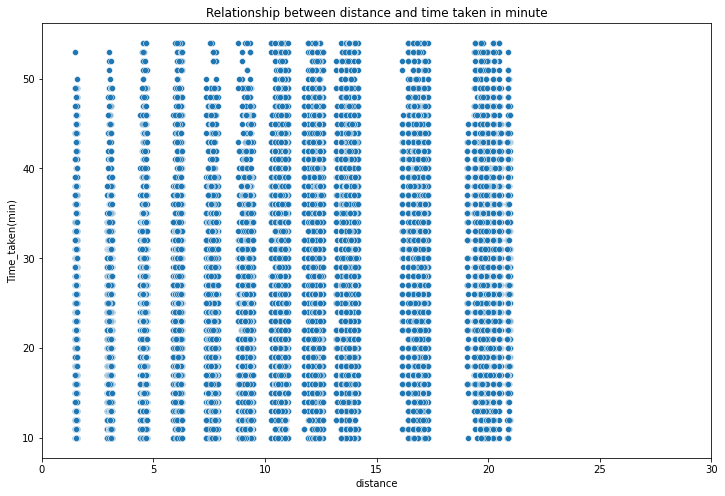

In [32]:
#Scatter plot showing relation between distance and time taken in minute
plt.figure(figsize=(12,8))

sns.scatterplot(x=df["distance"],y=df["Time_taken(min)"])
plt.xlim(0,30)
plt.title("Relationship between distance and time taken in minute")
plt.show()

There is consistent relation between time taken to deliver food and distance.

Now let’s have a look at the relationship between the time taken to deliver the food and the ratings of the delivery partner:

In [31]:
df["Delivery_person_Ratings"].value_counts()

4.6    8848
4.8    7148
4.7    7142
4.9    7041
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: Delivery_person_Ratings, dtype: int64

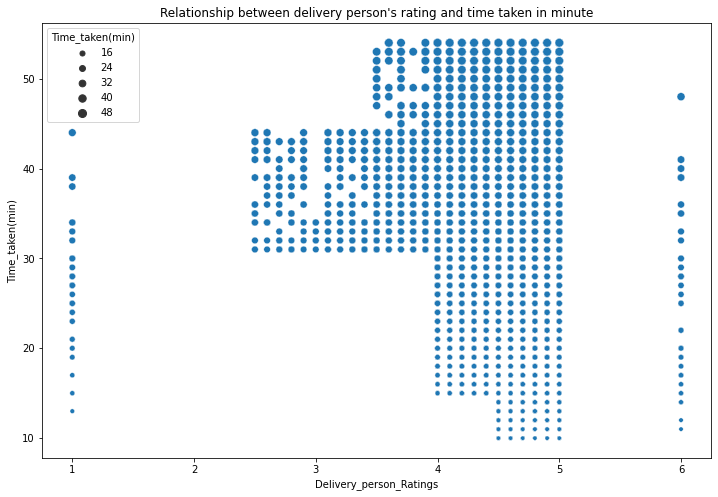

In [36]:
#Scatter plot showing relation between delivery person's rating and time taken to deliver the food
plt.figure(figsize=(12,8))

sns.scatterplot(x=df["Delivery_person_Ratings"],y=df["Time_taken(min)"],size=df["Time_taken(min)"])
plt.title("Relationship between delivery person's rating and time taken in minute")
plt.show()

There is an inverse relation between both the variables which means that person with higher rating takes less time to deliver the food.

Let's see the relationship betweem delivery person's age and time taken to deliver the food

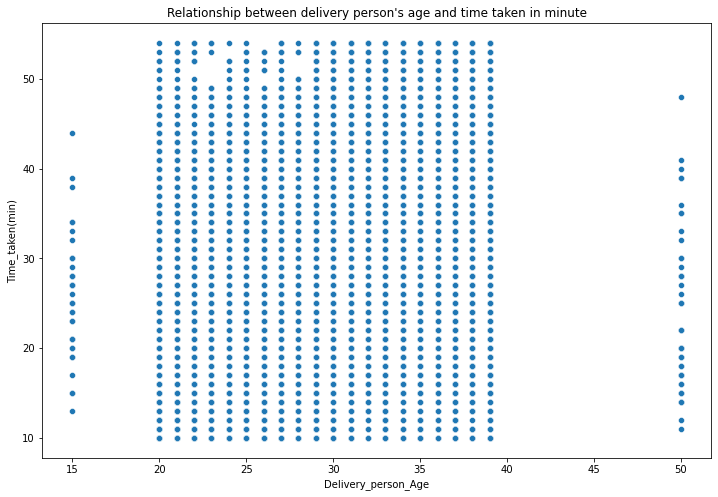

In [39]:
#Scatter plot showing relation between delivery person's age and time taken to deliver the food
plt.figure(figsize=(12,8))

sns.scatterplot(x=df["Delivery_person_Age"],y=df["Time_taken(min)"])
plt.title("Relationship between delivery person's age and time taken in minute")
plt.show()

Time taken to deliver the food is not affected by the delivery person's age.

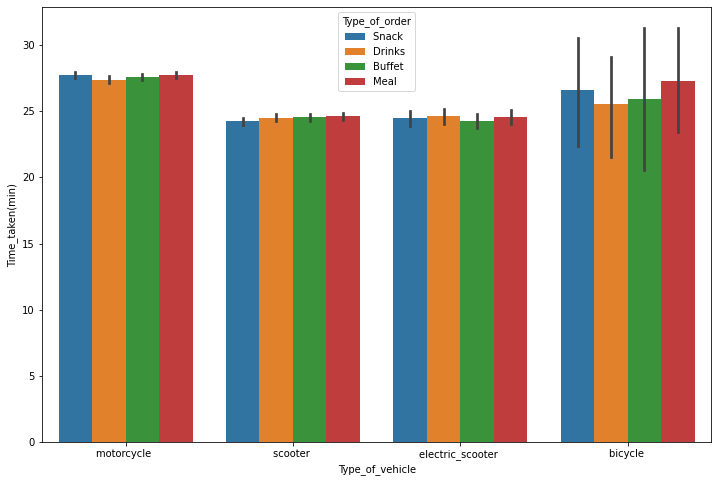

In [44]:
#Relationship between Type of vehichle and time taken to deliver the food based on type of food
plt.figure(figsize=(12,8))
sns.barplot(x=df["Type_of_vehicle"],y=df["Time_taken(min)"],hue=df["Type_of_order"])
plt.show()

We can see that type of vehicla and type of food does not affect much on time taken to deliver the food

From the bi-variate analysis we have seen that age, rating and distance between the locations are an important variables hence, we will create a model using these variables

Now let’s train a Machine Learning model using an LSTM neural network model for the task of food delivery time prediction:

In [52]:
from sklearn.model_selection import train_test_split

X=df[["Delivery_person_Age","Delivery_person_Ratings","distance"]]
y=df[["Time_taken(min)"]]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=1)

In [53]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model=Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 128)            66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
Total params: 117,593
Trainable params: 117,593
Non-trainable params: 0
_________________________________________________________________


In [56]:
# train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=9)

Epoch 1/9
41033/41033 [==============================] - 445s 11ms/step - loss: 71.1776
Epoch 2/9
41033/41033 [==============================] - 506s 12ms/step - loss: 62.0225
Epoch 3/9
41033/41033 [==============================] - 394s 10ms/step - loss: 60.3835
Epoch 4/9
41033/41033 [==============================] - 390s 9ms/step - loss: 59.4810
Epoch 5/9
41033/41033 [==============================] - 425s 10ms/step - loss: 59.4744
Epoch 6/9
41033/41033 [==============================] - 407s 10ms/step - loss: 59.0563
Epoch 7/9
41033/41033 [==============================] - 6258s 153ms/step - loss: 58.5983
Epoch 8/9
41033/41033 [==============================] - 412s 10ms/step - loss: 58.8197
Epoch 9/9
41033/41033 [==============================] - 412s 10ms/step - loss: 58.4023


Let's test the performance of model

In [55]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])

print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 30
Ratings of Previous Deliveries: 3
Total Distance: 10
1/1 [==============================] - 2s 2s/step
Predicted Delivery Time in Minutes =  [[26.302769 26.303204 26.303228 26.302639 26.303253 26.303228 26.303133
  26.302586 26.300695 26.30299  26.30329  26.302778 26.301704 26.30235
  26.303219 26.302921 26.303064 26.302359 26.302473 26.303162 26.303211
  26.303299 26.303293 26.303215 26.302986]]
